In [5]:
import sys
print("Versão do Python:", sys.version)

Versão do Python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [41]:
df = pd.read_csv('C:/Users/rmuni/archive/Country-data.csv')

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [10]:
df['country'].nunique()

167

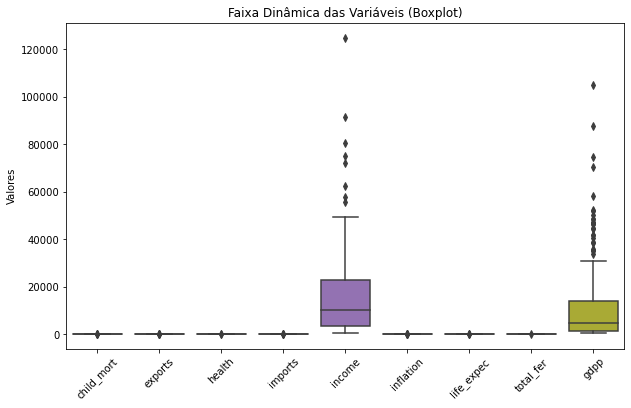

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Faixa Dinâmica das Variáveis (Boxplot)")
plt.xticks(rotation=45)
plt.ylabel("Valores")
plt.show()

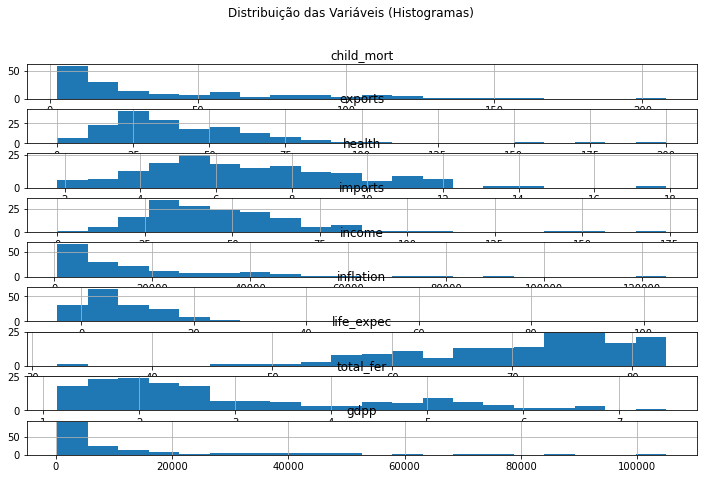

In [18]:
df_country.hist(bins=20, figsize=(12, 8), layout=(len(df.columns), 1))
plt.suptitle("Distribuição das Variáveis (Histogramas)")
plt.show()

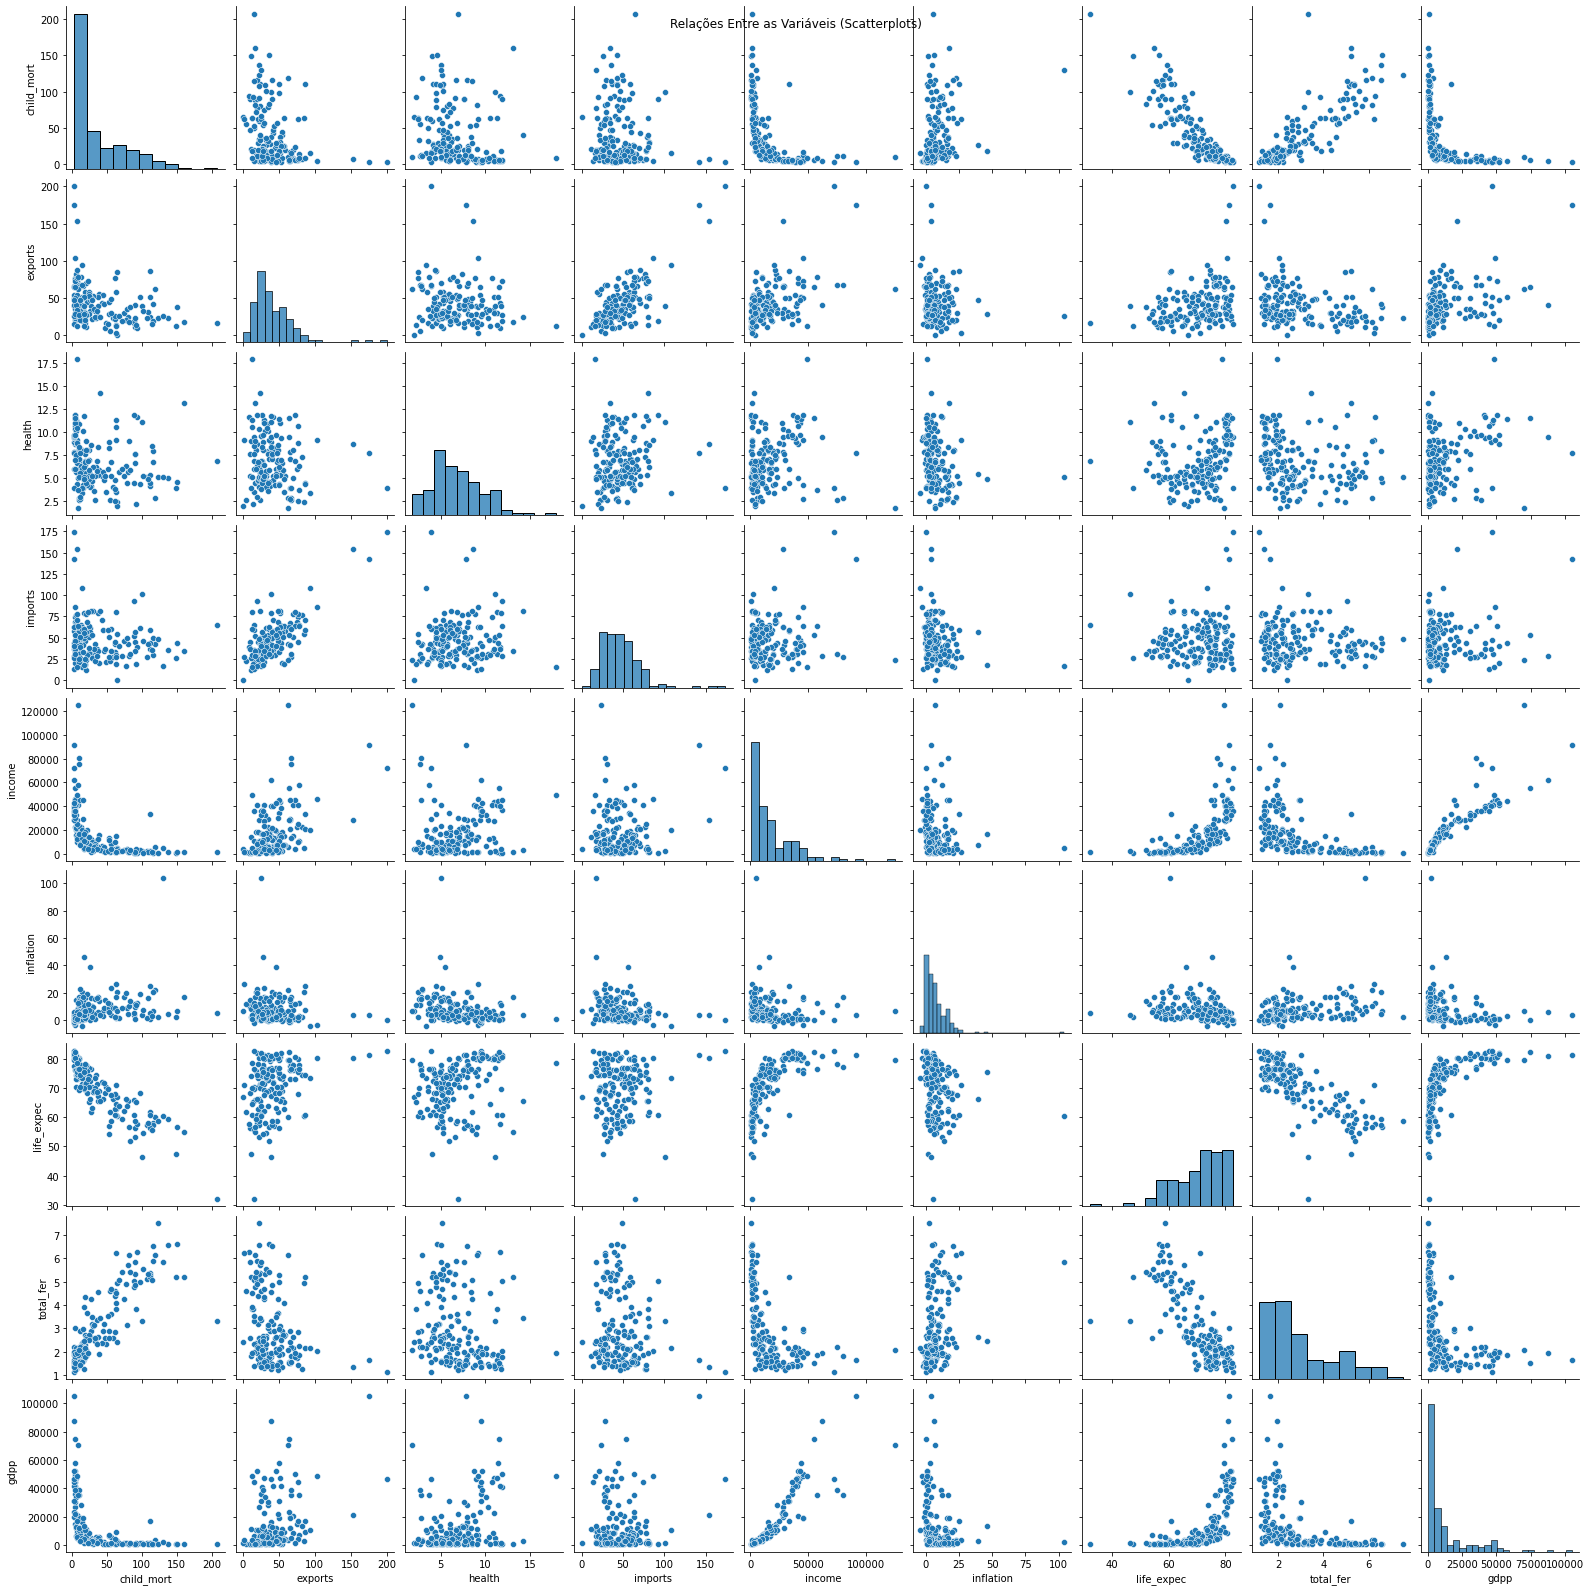

In [22]:
sns.pairplot(df)
plt.suptitle("Relações Entre as Variáveis (Scatterplots)")
plt.show()

In [43]:
df_sem_pais = df.drop('country', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_sem_pais)

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)

In [50]:
# Centrando cada cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids)
# Visualizar os clusters
print("Centróides dos clusters (não padronizados):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

[[5.00000000e+00 5.87388889e+01 8.80777778e+00 5.14916667e+01
  4.56722222e+04 2.67125000e+00 8.01277778e+01 1.75277778e+00
  4.24944444e+04]
 [9.29617021e+01 2.91512766e+01 6.38851064e+00 4.23234043e+01
  3.94240426e+03 1.20196809e+01 5.91872340e+01 5.00808511e+00
  1.92238298e+03]
 [2.19273810e+01 4.02439167e+01 6.20095238e+00 4.74734036e+01
  1.23055952e+04 7.60090476e+00 7.28142857e+01 2.30750000e+00
  6.48645238e+03]]
Centróides dos clusters (não escalados):
Cluster 0: [5.00000000e+00 5.87388889e+01 8.80777778e+00 5.14916667e+01
 4.56722222e+04 2.67125000e+00 8.01277778e+01 1.75277778e+00
 4.24944444e+04]
Cluster 1: [  92.96170213   29.1512766     6.38851064   42.32340426 3942.40425532
   12.01968085   59.18723404    5.00808511 1922.38297872]
Cluster 2: [2.19273810e+01 4.02439167e+01 6.20095238e+00 4.74734036e+01
 1.23055952e+04 7.60090476e+00 7.28142857e+01 2.30750000e+00
 6.48645238e+03]


In [48]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [81]:
# Encontrar os países mais próximos dos centróides
cluster_fields = ['gdpp', 'income', 'total_fer','exports','child_mort','imports','inflation','health','life_expec']
for cluster in range(3):
    cluster_data = df[df['Cluster_KMeans'] == cluster]
    #print(cluster_data)
    centroide = centroids[cluster]
    distancias = cluster_data[cluster_fields].apply(
        lambda row: ((row - centroide) ** 2).sum() ** 0.5, axis=1
    )
    cluster_data['distancia']= distancias
    representativo = cluster_data[cluster_data['distancia'] == distancias.min()]
    print(f"Cluster {cluster}: País representativo: {representativo['country']}")

Cluster 0: País representativo: 134    Slovak Republic
Name: country, dtype: object
Cluster 1: País representativo: 37    Congo, Dem. Rep.
Name: country, dtype: object
Cluster 2: País representativo: 109    Nepal
Name: country, dtype: object


<ipython-input-81-b3f515203a38>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['distancia']= distancias
<ipython-input-81-b3f515203a38>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['distancia']= distancias
<ipython-input-81-b3f515203a38>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

O algoritimo de kmeans é sensivel à presença de outliers poe pelo menos 4 motivos:

1 - Uso da Média como Centroide:
O K-médias calcula o centroide de cada cluster com base na média aritmética das amostras. A média é altamente influenciada por valores extremos (outliers). Assim, um outlier pode deslocar o centroide significativamente, mesmo que seja apenas um ponto distante do resto dos dados.

2 - Impacto nos Clusters:
Outliers podem fazer com que os centróides não representem adequadamente o grupo principal de dados. Isso pode levar a uma segmentação dos clusters que não reflete a estrutura verdadeira dos dados, afetando a qualidade da separação.

3 - Problemas de Convergência:
Os outliers podem causar maior número de iterações para o algoritmo convergir ou, em alguns casos, resultar em uma solução subótima.

4 - Clusters Desbalanceados:
Um outlier pode ser atribuído a um cluster individualmente, criando um cluster artificial ou desbalanceado, enquanto os demais dados são agrupados de forma inadequada.

Já o algoritimo DBSCAN é robusto a outliers devido a sua forma de lidar com pontos que não pertencem a nenhuma região densa de dados. Alguns motivos:

Definição de densidade:
O DBSCAN identifica clusters como regiões densas de pontos, com base nos parâmetros:

1.	Definição de densidade:
O DBSCAN identifica clusters como regiões densas de pontos, com base nos parâmetros:
•	Epsilon (ϵϵ): raio da vizinhança para considerar um ponto.
•	MinPts: número mínimo de pontos necessários para formar uma região densa.
2.	Classificação de pontos:
Os pontos são categorizados como:
•	Pontos centrais: possuem pelo menos MinPtsMinPts vizinhos dentro do raio ϵϵ.
•	Pontos de borda: não possuem MinPtsMinPts vizinhos, mas estão na vizinhança de um ponto central.
•	Outliers (ou pontos de ruído): não são nem centrais nem de borda, ou seja, estão isolados de regiões densas.
3.	Tratamento de outliers:
Pontos classificados como ruído (outliers) não são atribuídos a nenhum cluster e permanecem como pontos isolados. Isso torna o algoritmo resistente a interferências desses pontos, evitando que outliers influenciem na definição dos clusters principais.

In [85]:
# Aplicar a ligação hierárquica
linkage_matrix = linkage(scaled_data, method='ward')

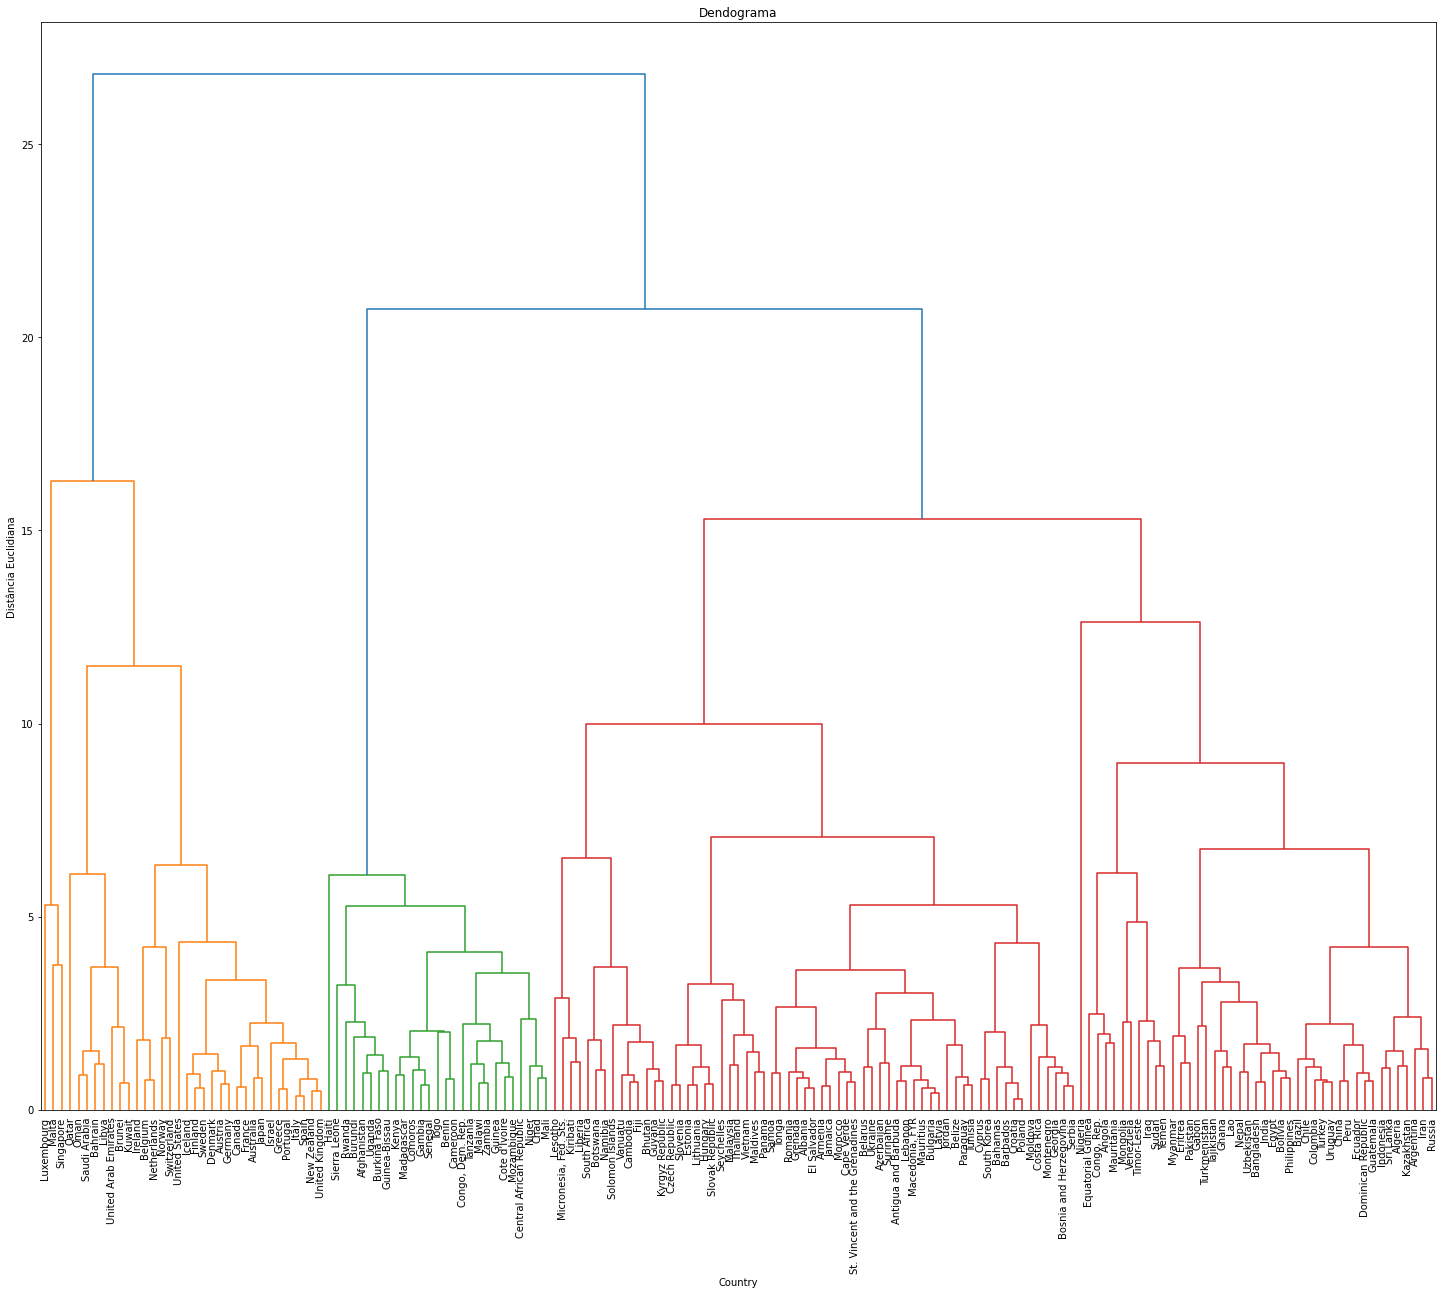

In [92]:
# Plotar o dendograma
plt.figure(figsize=(25, 20))
dendrogram(linkage_matrix, labels=df['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendograma')
plt.xlabel('Country')
plt.ylabel('Distância Euclidiana')
plt.show()

In [88]:
# Clusterização Hierárquica com 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster_Hierárquico'] = hierarchical.fit_predict(scaled_data)

Comparação entre K-Médias e Clusterização Hierárquica
Semelhanças:
Ambos identificam grupos de países com características semelhantes.
Utilizam métricas de distância para definir os clusters.

Diferenças:
K-Médias:
Baseado em centróides.
Rápido para grandes datasets, mas precisa de um número de clusters pré-definido (
𝐾
K).
Clusterização Hierárquica:
Não precisa de 
𝐾
K pré-definido para gerar o dendograma.
Melhor para conjuntos de dados menores, pois é computacionalmente mais intensivo.

Etapas do algoritmo de K-Médias até sua convergência:
Inicialização:

Escolha 
𝐾
K centróides iniciais, geralmente de forma aleatória ou com o método K-Means++.
Atribuição aos clusters:

Para cada ponto de dado, calcule a distância até cada centróide.
Atribua o ponto ao cluster do centróide mais próximo.
Recalcular os centróides:

Atualize a posição de cada centróide como o baricentro (média) de todos os pontos atribuídos ao cluster.
Iteração:

Repita os passos de atribuição e atualização até que os centróides não mudem significativamente ou até atingir um número máximo de iterações.
Convergência:

O algoritmo converge quando os deslocamentos dos centróides entre as iterações são menores que um limiar pré-definido.
